# PROBLEM STATEMENT

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

**1. Which variables are significant in predicting the demand for shared bikes.**

**2. How well those variables describe the bike demands**

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## IMPORTING ALL REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (10,6)})

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


import datetime     
from scipy.stats import pearsonr 

## Data understanding, preparation and EDA

### 1. READING DATASET AND UNDERSTANDING DATA

In [2]:
#read the dataset
bike_share = pd.read_csv('day.csv')
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#shape of dataset
bike_share.shape

(730, 16)

In [4]:
#info of dataset
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#null values check 
bike_share.isnull()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
#dimension check of dataset
bike_share.ndim

2

#### There is no null or missing  values in our dataset

### Let's Convert the datatype of dteday column to datetime.

In [7]:
bike_share['dteday']= pd.to_datetime(bike_share['dteday'],format = '%d-%m-%Y')
bike_share['dteday'].dtype

dtype('<M8[ns]')

### Extracting Year and month from the date

In [8]:
bike_share['year'] = pd.DatetimeIndex(bike_share['dteday']).year
bike_share['month'] = pd.DatetimeIndex(bike_share['dteday']).month

In [9]:
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [10]:
#Dropping the columns that we extracted the correct year and month from the date
bike_share.drop(['yr','mnth'], axis=1, inplace = True)
bike_share.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [11]:
#Dropping the redundant variable holiday as the workingday column covers enough information that is required.

bike_share.drop('holiday',axis=1,inplace=True)

In [12]:
# Dropping the dteday,instant,casual and registered columns.

bike_share.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)
bike_share.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [13]:
# Renaming some columns for better understanding

bike_share.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)
bike_share.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


## 2. Encoding the labels and visualization

- 1) **Season**
    - 1 : Spring
    - 2 : Summer
    - 3 : Fall
    - 4 : Winter

In [14]:
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bike_share['season'] = bike_share['season'].map(codes)

<AxesSubplot:xlabel='season', ylabel='count'>

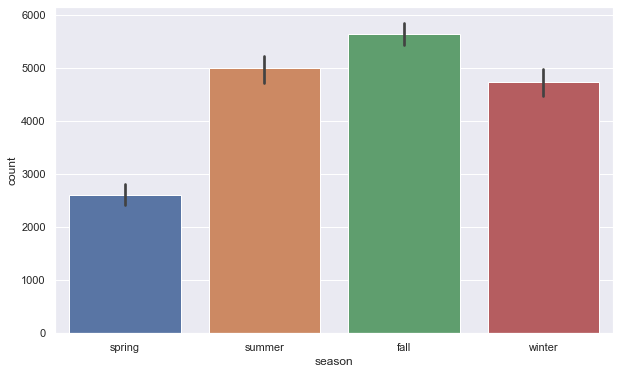

In [15]:
sns.barplot('season','count',data=bike_share)

**`Bike Rentals are more during FALL (MANSOON ) Season`**

- 2) Weathersit 
     - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
     - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
     - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
     - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [16]:
codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bike_share['weathersit'] = bike_share['weathersit'].map(codes)

<AxesSubplot:xlabel='weathersit', ylabel='count'>

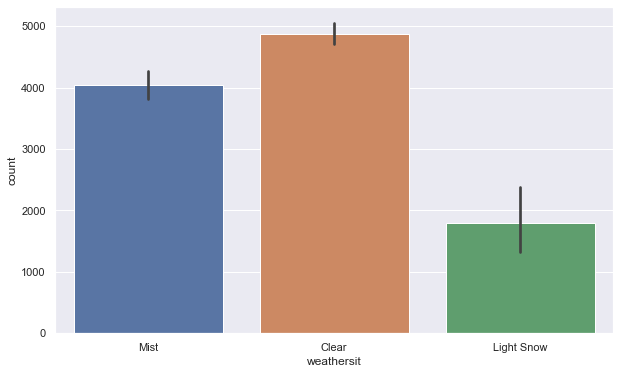

In [17]:
sns.barplot('weathersit','count',data=bike_share)

**`Bikes seem to be rented more in Partly cloudy weather`**

 - 3) workingday
     -  if day is neither weekend nor holiday is 1,
     - otherwise is 0

In [18]:
codes = {1:'working_day',0:'Holiday'}
bike_share['workingday'] = bike_share['workingday'].map(codes)

<AxesSubplot:xlabel='workingday', ylabel='count'>

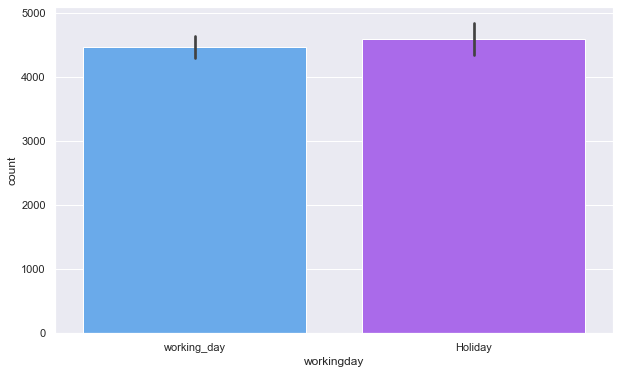

In [19]:
sns.barplot('workingday','count',data=bike_share,palette='cool')

**`Bikes seem to be rented more on working days.`**

- 4) year
     - 2018:0
     - 2019:1

In [20]:
codes = {2019:1,2018:0}
bike_share['year'] = bike_share['year'].map(codes)

<AxesSubplot:xlabel='year', ylabel='count'>

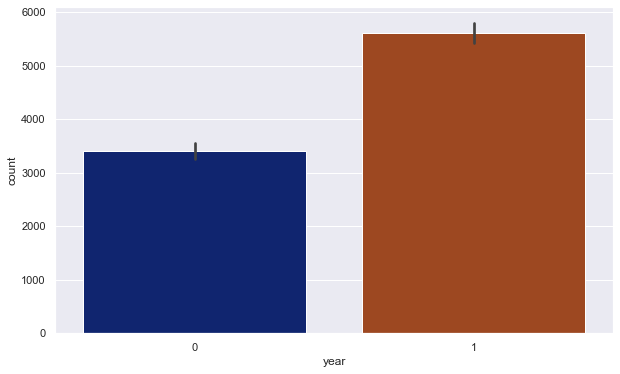

In [21]:
sns.barplot('year','count',data=bike_share,palette='dark')

**`Bike Rental popularity has increased in 2019 when compared to 2018`**

- 5) Month
    - 1:Jan
    - 2:Feb
    - 3:Mar
    - 4:Apr
    - 5:May
    - 6:June
    - 7:July
    - 8:Aug
    - 9:Sep
    - 10:Oct
    - 11:Nov
    - 12:Dec

In [22]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike_share['month'] = bike_share['month'].map(codes)

<AxesSubplot:xlabel='month', ylabel='count'>

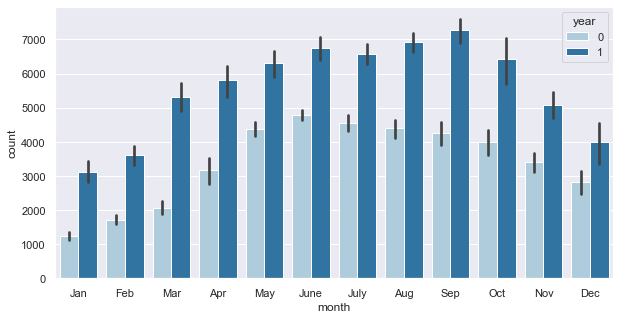

In [23]:
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=bike_share,palette='Paired')

- 6) WeekDay:
    - 0:Mon
    - 1:Tue
    - 2:Wed
    - 3:Thu
    - 4:Fri
    - 5:Sat
    - 6:Sun

In [24]:
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike_share['weekday'] = bike_share['weekday'].map(codes)

<AxesSubplot:xlabel='weekday'>

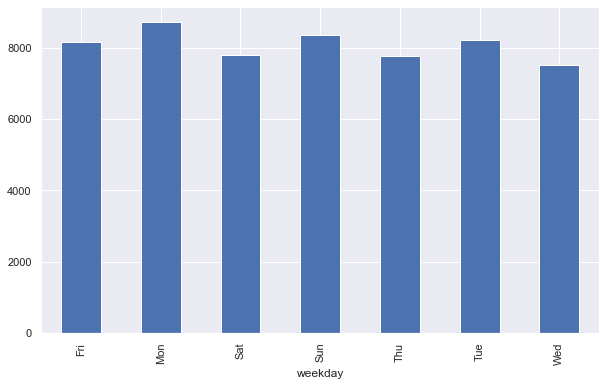

In [25]:
bike_share.groupby('weekday')['count'].max().plot(kind='bar')

**`Bike Rentals are maximum on Sunday and Monday`**

- 7) temp

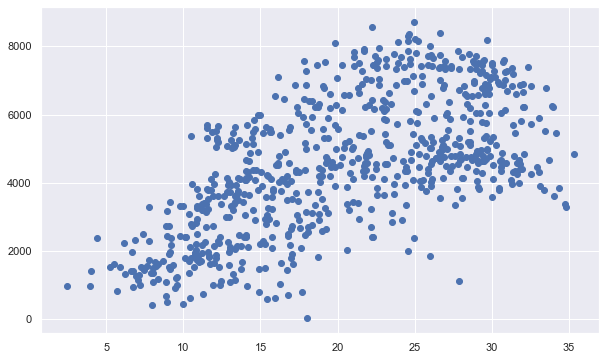

In [26]:
plt.scatter('temp','count',data=bike_share)

**`Bike Rentals are observed at higher temperatures.`**

- 8) atemp

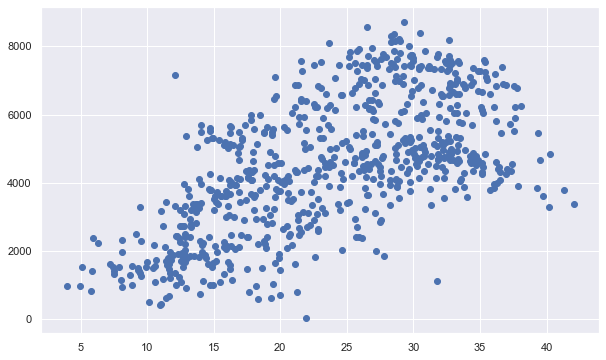

In [27]:
plt.scatter('atemp','count',data=bike_share)

**`Bike Rentals are observed at higher "feel-like" temperatures.`**

- 9) Humidity

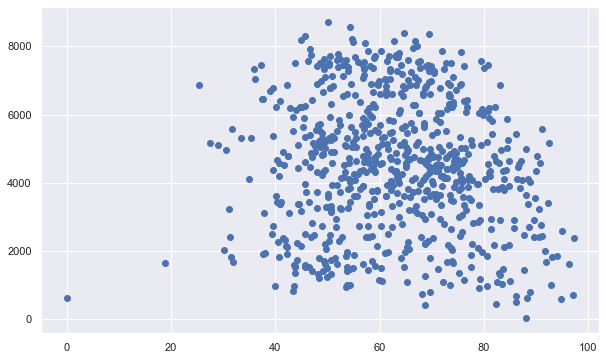

In [28]:
plt.scatter('humidity','count',data=bike_share)

**`Temperature being directly proportional to Humidity, Bike Rentals are making during high humidity.`**

- 10) Windspeed

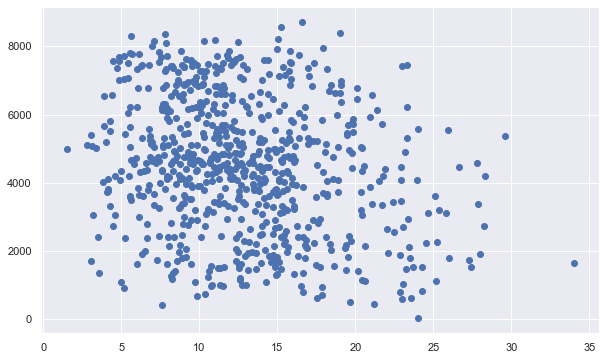

In [29]:
plt.scatter('windspeed','count',data=bike_share)

**`Wind speeds increase with a greater temperature difference.Wind speed near the surface is most highly correlated with the temperature.`**

<AxesSubplot:xlabel='count', ylabel='Density'>

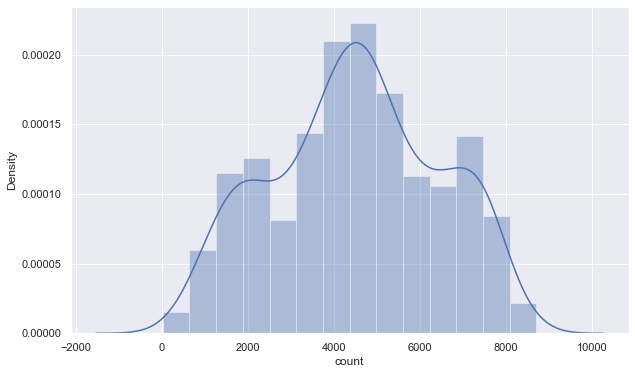

In [30]:
sns.distplot(bike_share['count'])

## 3: Visualizing the Relationship among variables

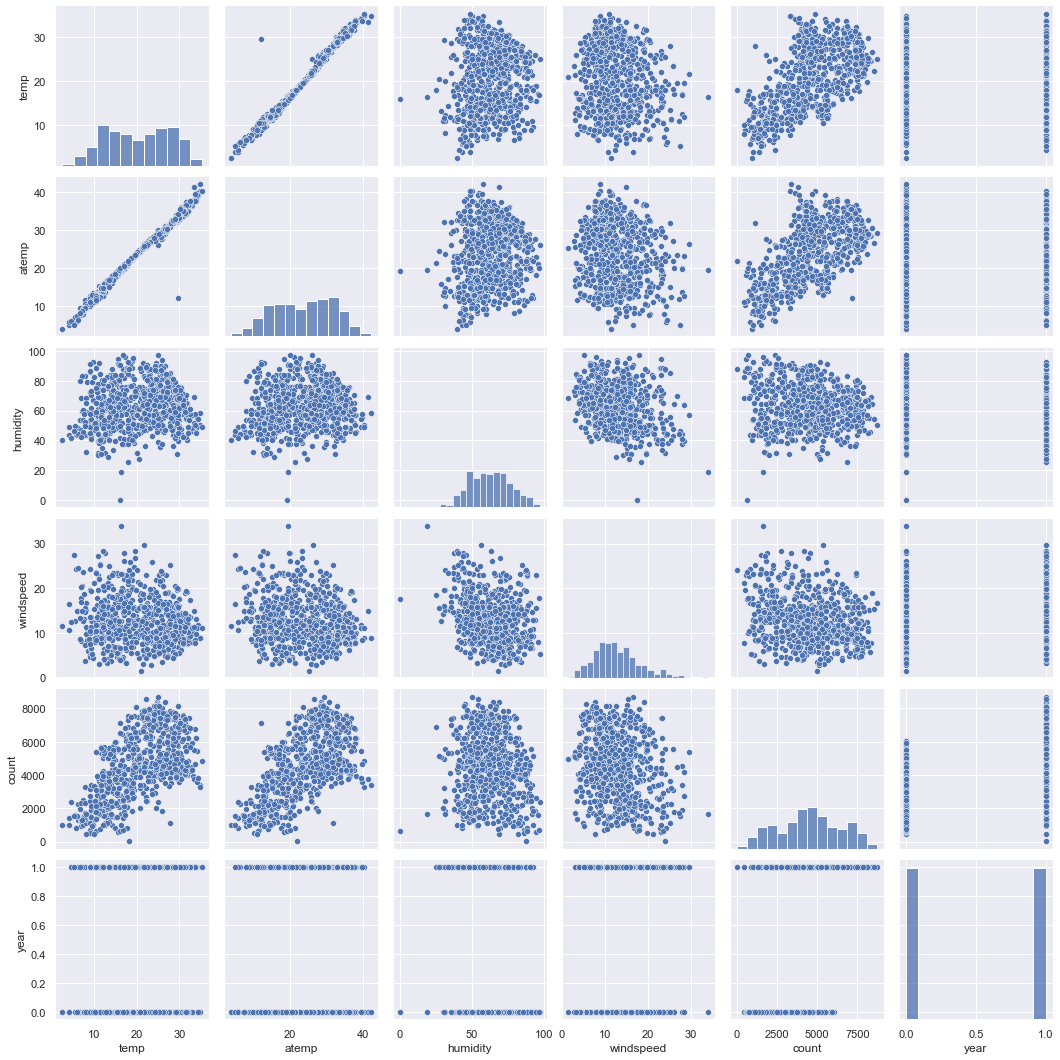

In [31]:
sns.pairplot(bike_share)

<AxesSubplot:>

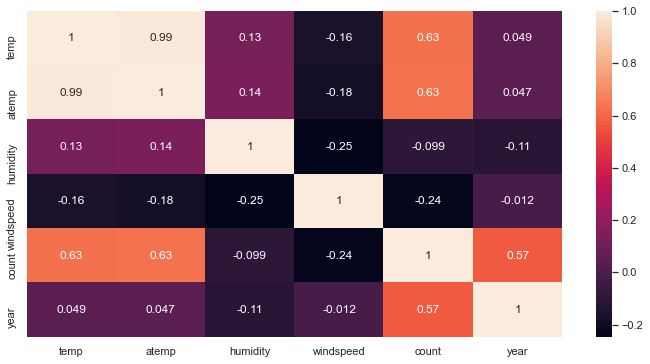

In [32]:
plt.figure(figsize = (12,6))
sns.heatmap(bike_share.corr(),annot=True)

<AxesSubplot:>

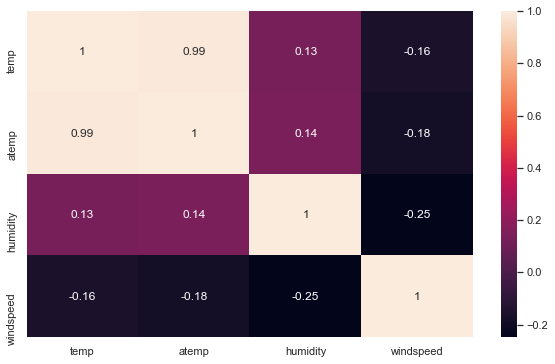

In [33]:
data= bike_share[['temp','atemp','humidity','windspeed']]
sns.heatmap(data.corr(),annot=True)

**`It is observed that atemp and temp are highly correlated and one can be dropped to avoid multicollinearity.`**

In [34]:
bike_share.drop('atemp',axis=1,inplace=True)
bike_share.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan


## 4 : Dealing With Categorical Variables

In [35]:
seasons = pd.get_dummies(bike_share['season'],drop_first=True)

working_day = pd.get_dummies(bike_share['workingday'],drop_first=True)

weather= pd.get_dummies(bike_share['weathersit'],drop_first=True)

month= pd.get_dummies(bike_share['month'],drop_first=True)

week_day= pd.get_dummies(bike_share['weekday'],drop_first=True)

In [36]:
bike_share= pd.concat([bike_share,seasons,working_day,weather,month,week_day],axis=1)
bike_share.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan,...,0,0,0,0,0,0,0,0,1,0
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan,...,0,0,0,0,0,0,0,0,0,1
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan,...,0,0,0,0,0,0,0,1,0,0
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan,...,0,0,0,0,0,0,0,0,0,0
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan,...,0,0,0,0,0,1,0,0,0,0


In [37]:
# Dropping the categorical variables as they are already dummy-encoded.

bike_share.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)
bike_share.head()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,14.110847,80.5833,10.749882,985,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## 5: Splitting the Data into Training and Testing Sets

In [38]:
np.random.seed(0)
df_train, df_test = train_test_split(bike_share, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [40]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

# Apply scaler() to all the columns except the'dummy' variables.

num_vars=['temp','humidity','windspeed','count']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

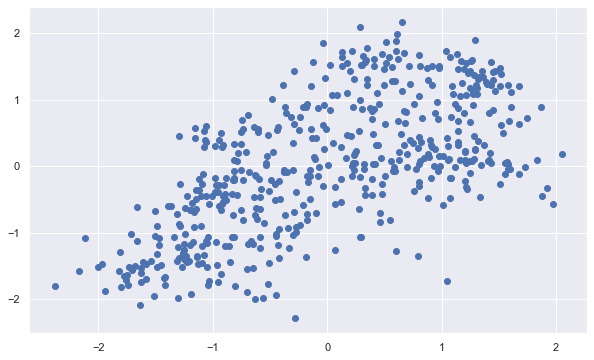

In [41]:
plt.scatter('temp','count',data=df_train)

### Dividing into X and Y sets for the model building

In [42]:
y_train = df_train.pop('count')
X_train = df_train

## 6: Building a linear model

Using Recursive feature elimination(RFE) for automated Feature Selection approach

In [43]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('humidity', False, 10),
 ('windspeed', False, 8),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', False, 2),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 17),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 15),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 16),
 ('Sun', True, 1),
 ('Thu', False, 14),
 ('Tue', False, 12),
 ('Wed', False, 11)]

In [45]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'year', 'spring', 'working_day', 'Light Snow', 'Mist', 'July',
       'Sep', 'Mon', 'Sun'],
      dtype='object')

In [52]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [53]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.16e-176
Time:                        23:30:29   Log-Likelihood:                -292.12
No. Observations:                 510   AIC:                             606.2
Df Residuals:                     499   BIC:                             652.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5893      0.136     -4.340      0.000      -0.856      -0.323
temp            0.4029      0.027     14.765      0.000       0.349       0.457
year            1.0473      0.039     27.009      0.000       0.971       1.123
spring         -0.6760      0.057    -11.825      0.000      -0.788      -0.564
working_day     0.3710      0.134      2.777      0.006       0.109       0.633
Light Snow     -1.2971      0.116    -11.212      0.000      -1.524      -1.070
Mist           -0.3619      0.041     -8.739      0.000      -0.443      -0.281
July           -0.3136      0.082     -3.834      0.000      -0.474      -0.153
Sep             0.2874      0.074      3.884      0.000       0.142       0.433
Mon             0.4613      0.142      3.259      0.001       0.183       0.739
Sun             0.4451      0.142      3.131      0.002       0.166       0.724
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.927
Skew:                          -0.645   Prob(JB):                     1.37e-29
Kurtosis:                       5.143   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Now we have all the variables with p-value less than 0.05.

In [54]:
X_train_new= X_train2.drop('const',axis=1)

### Variance Inflation Factor(VIF)

In [55]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,working_day,2.14
0,temp,2.01
2,spring,2.00
1,year,1.81
5,Mist,1.44
6,July,1.35
8,Sun,1.24
7,Sep,1.16
4,Light Snow,1.06


### All the variables have VIF less than 5 and it's perfect!

## 7: Residual Analysis of the train data

In [56]:
y_train_pred = lm1.predict(X_train2)

Text(0.5, 0, 'Errors')

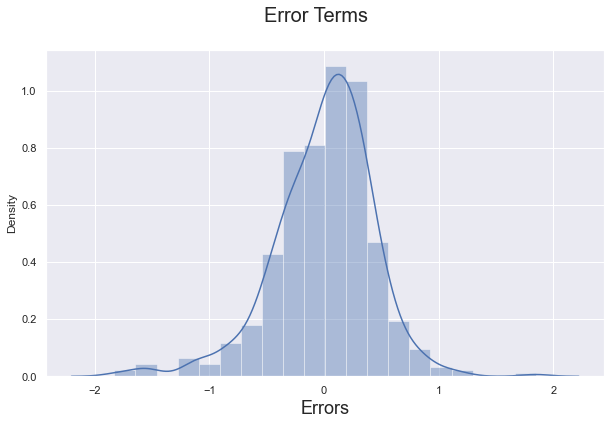

In [57]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

## 8: Making Predictions

In [58]:
num_vars=['temp','humidity','windspeed','count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

### Dividing into X_test and y_test

In [60]:
y_test = df_test.pop('count')
X_test = df_test

In [61]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [62]:
 # Making predictions
y_test_pred = lm1.predict(X_test_new)

##  9: Model Evaluation

Text(0, 0.5, 'Predictions')

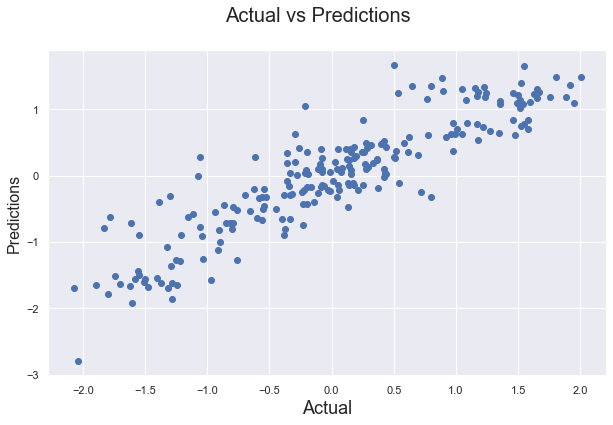

In [63]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16)                          # Y-label

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8035305530955212

**Conclusion:**
- The top 5 variables that are seen effecting and benefitting the Bike Rental count are as follows:

   - Spring season : -0.6842
   - Temperature : 0.3999
   - Mist : -0.3647
   - Sun : 0.2749
   - working_day : 0.2327

### Assumptions of Linear Regression:
  - The error terms are normally distributed.
  - The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.
  - The predicted values have linear relationship with the actual values.**